## Community Detection 
using modularity maximization algorithms 
- Clauset-Newman-Moore (CNM)
- Louvain
- Leiden


generate synthetic network using `Lancichinetti-Fortunato-Radicchi (LFR)` benchmarks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [44]:
from cdlib import algorithms , evaluation
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


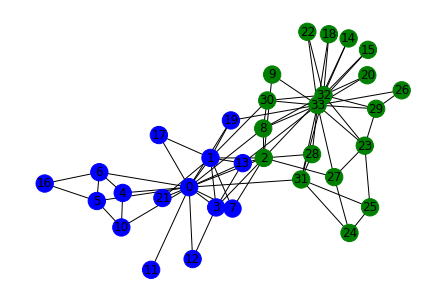

In [5]:
G = nx.karate_club_graph()
communities = girvan_newman(G)


    

In [42]:
def draw_graph_com(G,coms,colors=None,fig_size=(8,8)):
    
    color_map = {} # map vertex to community to be used as color map
    for i,com in enumerate(coms):
        for v in com:
            color_map[v] = i 
    plt.figure(figsize=fig_size)
    nx.draw(G,cmap=plt.get_cmap('viridis'),node_color=[color_map[v] for v in G.nodes],with_labels=True)
    plt.show()

In [73]:
type(G)

networkx.classes.graph.Graph

In [ ]:
def benchmark(G,algs):
    result = []
    for a in algs:
        result.append()

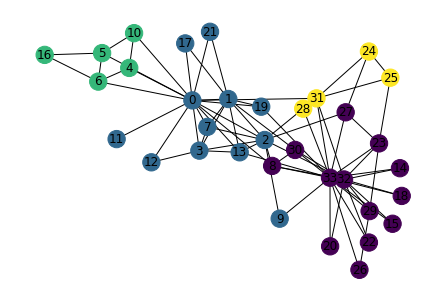

In [7]:
G = nx.karate_club_graph()
coms = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)

draw_graph_com(G,coms.communities)

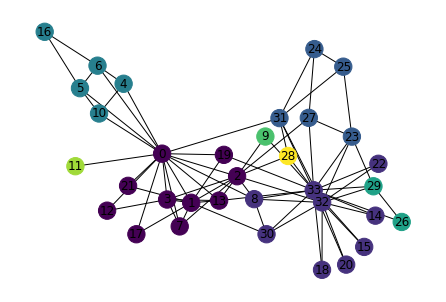

In [9]:
G = nx.karate_club_graph()
coms = algorithms.surprise_communities(G)

draw_graph_com(G,coms.communities)

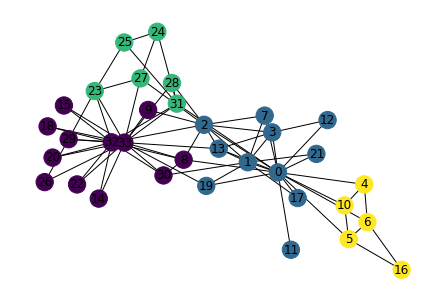

In [10]:
G = nx.karate_club_graph()
coms = algorithms.leiden(G)

draw_graph_com(G,coms.communities)

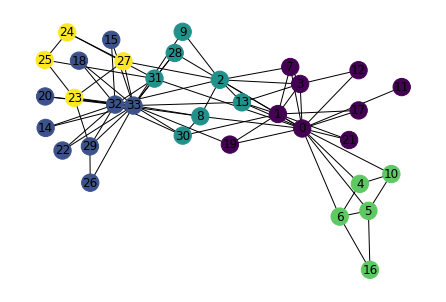

In [11]:
G = nx.karate_club_graph()
coms = algorithms.walktrap(G)

draw_graph_com(G,coms.communities)

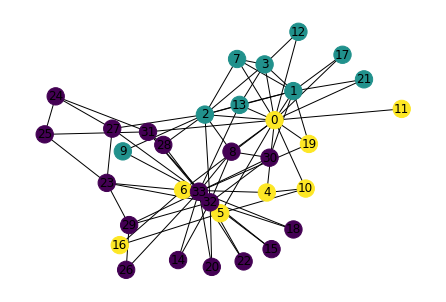

In [12]:
#Clauset-Newman-Moore
G = nx.karate_club_graph()
coms = algorithms.greedy_modularity(G)

draw_graph_com(G,coms.communities)

## LFR benchmark

In [15]:
from networkx.generators.community import LFR_benchmark_graph as lfr

In [17]:
# parameters
n = 250
tau1 = 3
tau2 = 1.5
mu = 0.1
G = lfr(
    n, tau1, tau2, mu, average_degree=5, min_community=20, seed=10
)

In [19]:
communities = [[G.nodes[v]["community"] for v in G]]
[c for c in communities]

[frozenset({3,
            7,
            13,
            14,
            20,
            23,
            24,
            27,
            28,
            29,
            31,
            36,
            37,
            39,
            40,
            46,
            54,
            55,
            58,
            63,
            65,
            69,
            72,
            75,
            76,
            78,
            82,
            83,
            85,
            89,
            90,
            93,
            105,
            106,
            114,
            117,
            118,
            122,
            124,
            125,
            127,
            129,
            133,
            134,
            136,
            142,
            144,
            153,
            157,
            158,
            162,
            167,
            168,
            169,
            173,
            175,
            178,
            180,
            182,
            184,
            19

In [21]:
l = [G.nodes[v]["community"] for v in G]

In [36]:
def to_community_list(G):
    #Assumption: communities are disjoint
    l=[]
    visited=set()
    for v in G:
        if v not in visited:
            temp = [node for node in G.nodes[v]["community"]]
            l.append(temp)
            for t in temp:
                visited.add(t)
    return l      

In [67]:
def to_vertex_community(coms):
    return [
        x[1]
        for x in sorted(
            [
                (node, nid)
                for nid, cluster in enumerate(coms)
                for node in cluster
            ],
            key=lambda x: x[0],
        )
    ]

In [45]:
y_true = to_community_list(G)

In [47]:
coms

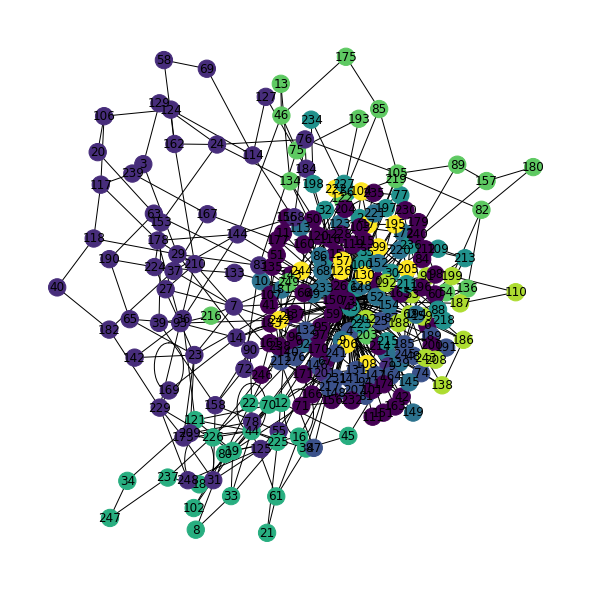

In [48]:
coms = algorithms.louvain(G,weight='weight',resolution=1.,randomize=False)

draw_graph_com(G,coms.communities)

In [69]:
evaluation.normalized_mutual_information()


TypeError: 'NodeClustering' object is not iterable

In [52]:
from sklearn.metrics import normalized_mutual_info_score

In [72]:
normalized_mutual_info_score(to_vertex_community(y_true),to_vertex_community(coms.communities))

0.5666286886324403

In [54]:
y_true

[[0,
  1,
  2,
  4,
  5,
  6,
  9,
  10,
  11,
  15,
  17,
  25,
  26,
  30,
  32,
  35,
  41,
  42,
  43,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  56,
  57,
  59,
  60,
  62,
  64,
  66,
  67,
  68,
  71,
  73,
  74,
  77,
  79,
  81,
  84,
  86,
  87,
  88,
  91,
  92,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  103,
  104,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  115,
  116,
  119,
  120,
  123,
  126,
  128,
  130,
  131,
  132,
  135,
  137,
  138,
  139,
  140,
  141,
  143,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  154,
  155,
  156,
  159,
  160,
  161,
  163,
  164,
  165,
  166,
  170,
  171,
  172,
  174,
  176,
  177,
  179,
  181,
  183,
  185,
  186,
  187,
  188,
  189,
  191,
  192,
  194,
  195,
  196,
  197,
  198,
  199,
  200,
  201,
  202,
  204,
  205,
  206,
  207,
  208,
  211,
  212,
  213,
  214,
  215,
  217,
  218,
  220,
  221,
  222,
  223,
  227,
  228,
  230,
  231,
  232,
  233,
  234,
  235,
  236,
  238,
  240,
  2